In [19]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df=pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Basic EDA

In [3]:
# Check the shape
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  39717
Columns :  111


In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
print("Columns")
print("-"*50)
for col in df.columns:
    print(col)

Columns
--------------------------------------------------
id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_

### Check for missing values

In [6]:
columns=[]
nulls=[]
for col in df.columns:
    if df[col].isna().sum() >0:
        columns.append(col)
        nulls.append(df[col].isna().sum())
missing_val_df=pd.DataFrame({'Feature':columns,'Nulls':nulls})
missing_val_df.sort_values(by='Nulls',ascending=False,inplace=True)
missing_val_df['Null_pct']=round((missing_val_df['Nulls']/39717)*100,2)

In [7]:
missing_val_df[missing_val_df['Null_pct']>=95.0].reset_index(drop=True)

,Feature,Nulls,Null_pct
0,bc_open_to_buy,39717,100.00
1,acc_open_past_24mths,39717,100.00
2,bc_util,39717,100.00
3,mo_sin_old_il_acct,39717,100.00
4,mo_sin_old_rev_tl_op,39717,100.00
5,mo_sin_rcnt_rev_tl_op,39717,100.00
6,mo_sin_rcnt_tl,39717,100.00
7,mort_acc,39717,100.00
8,mths_since_recent_bc,39717,100.00
9,mths_since_recent_bc_dlq,39717,100.00


**Observation**    
* 54 out of 111 columns are 100% empty, hence dropping them
* Similarly columns with more than 90% can be dropped



In [8]:
empty_columns=missing_val_df[missing_val_df['Null_pct']>=90.0]['Feature']
empty_columns=list(empty_columns)
df_clean=df.drop(empty_columns,axis=1)
df_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
# shape after dropping empty colummns
df_clean.shape

(39717, 55)

In [10]:
print("Non-Empty Features")
print("-"*50)
missing_val_df[missing_val_df['Null_pct']<92.0].reset_index(drop=True)

Non-Empty Features
--------------------------------------------------


,Feature,Nulls,Null_pct
0,mths_since_last_delinq,25682,64.66
1,desc,12940,32.58
2,emp_title,2459,6.19
3,emp_length,1075,2.71
4,pub_rec_bankruptcies,697,1.75
5,last_pymnt_d,71,0.18
6,chargeoff_within_12_mths,56,0.14
7,collections_12_mths_ex_med,56,0.14
8,revol_util,50,0.13
9,tax_liens,39,0.10


### Dealing with missing values

|#|Feature|Missing value%|Imputation Strategy|Comments|
|-|-------|---------------|-------------------|--------|
|1|mths_since_last_delinq|64.66|Impute with -1|Since delinquency cannot be imputed with any value|
|2|desc|32.58%|Impute with 'unknown'| The description could be anything, hence imputing with a string 'unknown'|
|3|emp_title|6.19|Impute with 'unknown'| The emp title cannot be imputed with any meaning values|
|4|emp_length|2.71|Impute with mean| Imputing with the column mean is a good idea|
|5|pub_rec_bankruptcies|1.75|Impute with -1| Since this feature cannot be imputed with any other value|
|6|last_pymnt_d|0.18|Drop|Since this feature cannot be imputed with any other value|
|7|chargeoff_within_12_mths|0.14|Drop|Since majority of the column values are 0|
|8|collections_12_mths_ex_med|0.14|Drop|Since majority of the column values are 0|
|9|revol_util|0.13|Drop|Very less number of data points
|10|tax_liens|0.10|Drop|Very less number of data points
|11|title|0.03|Drop|Very less number of data points
|12|last_credit_pull_d|0.01|Drop|Very less number of data points


In [11]:
df_clean['mths_since_last_delinq']=df_clean['mths_since_last_delinq'].fillna(-1)
df_clean['desc']=df_clean['desc'].fillna("unknown")
df_clean['emp_title']=df_clean['emp_title'].fillna("unknown")
df_clean['emp_length']=df_clean['emp_length'].fillna(np.mean)
df_clean['pub_rec_bankruptcies']=df_clean['pub_rec_bankruptcies'].fillna(-1)

In [12]:
df_clean=df_clean[~(df['last_pymnt_d'].isna() | 
                   df['chargeoff_within_12_mths'].isna() |
                   df['collections_12_mths_ex_med'].isna() |
                   df['revol_util'].isna() |
                   df['tax_liens'].isna() |
                   df['title'].isna() |
                   df['last_credit_pull_d'].isna() )]
df_clean.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_ba

**Observation**   
Since the title cannot be imputed by any other value and also the percentage of missing value is very low. dropping rows with missing title value is ok

In [13]:
# dropping rows with empty title
df_clean=df_clean[~(df_clean['title'].isna())]
df_clean.shape

(39531, 55)

In [14]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [33]:
data['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39661     36 months
39662     36 months
39663     36 months
39664     36 months
39665     36 months
Name: term, Length: 39531, dtype: object

In [ ]:
# distribution plots
f=['loan_amnt', 'funded_amnt','funded_amnt_inv']

### Univariate Analysis

The below features can be excluded from analysis
* id
* member_id

In [15]:
data=df_clean.drop(['id','member_id'],axis=1)

In [16]:
data.shape

(39531, 53)

In [17]:
data['grade'].value_counts()

B    11986
A    10056
C     8046
D     5271
E     2820
F     1040
G      312
Name: grade, dtype: int64

B    11986
A    10056
C     8046
D     5271
E     2820
F     1040
G      312
Name: grade, dtype: int64


<AxesSubplot: xlabel='grade', ylabel='count'>

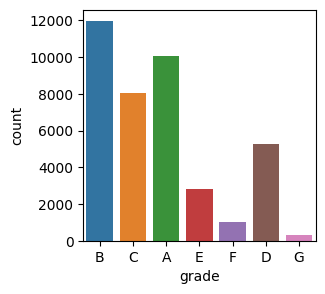

In [20]:
# check class balance
print(data['grade'].value_counts())

# check the balance of the data set
fig = plt.figure(figsize = (3,3))
sns.countplot(x=data["grade"])

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

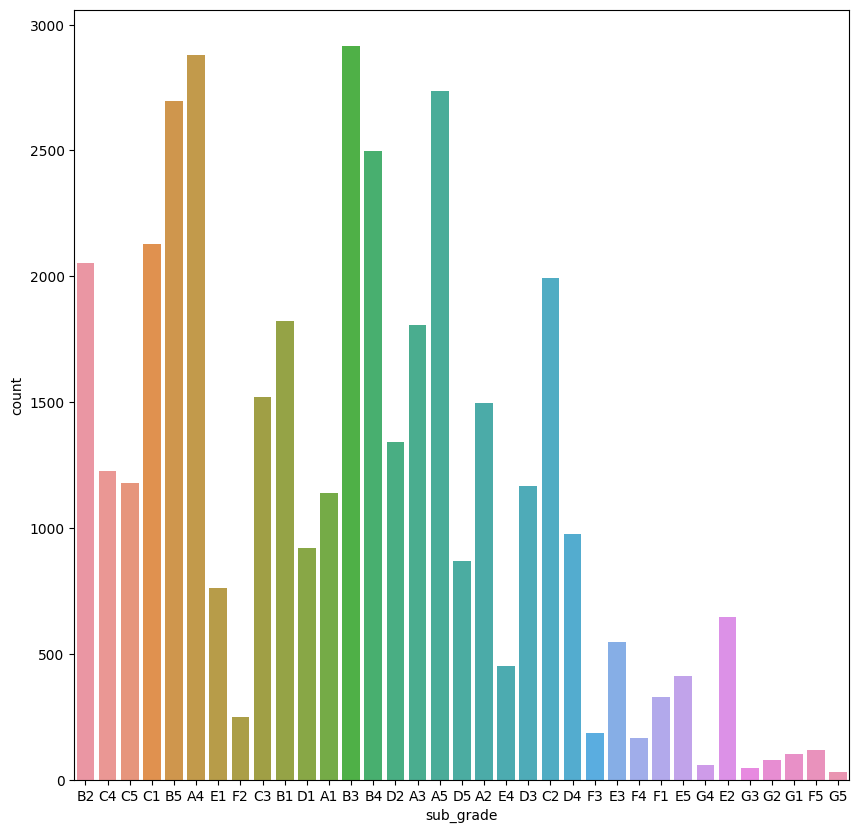

In [30]:
df_clean['sub_grade'].value_counts()
# check the balance of the data set
fig = plt.figure(figsize = (10,10))
sns.countplot(x=data["sub_grade"],orient="h")

<AxesSubplot: xlabel='loan_amnt', ylabel='Count'>

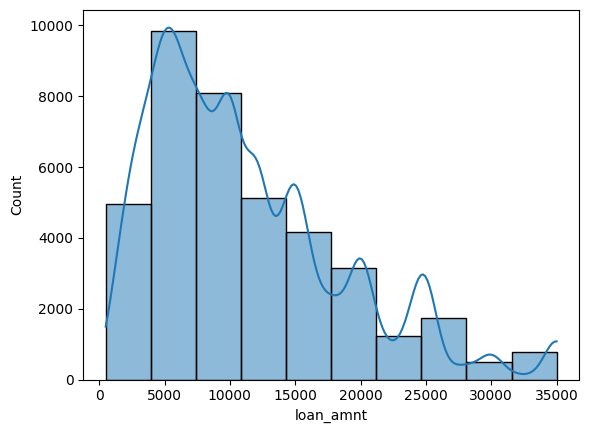

In [31]:
sns.histplot(data['loan_amnt'],bins = 10, kde = True, cbar = True)

In [ ]:
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(data.columns)
for i in range(3):
    for j in range(4):
            # sns.distplot(data[columns[k]], ax = ax1[i][j], color = 'red')
            sns.histplot(data_balanced[columns[k]],ax=ax1[i][j],bins = 10, kde = True, cbar = True)
            k += 1
plt.show()